In [1]:
import pandas as pd
import os
from tqdm import tqdm_notebook
import scanpy as sc

%run ../src/count_matrix_metrics.py
%run ../src/utils.py

### Allen smFISH

In [2]:
df_spatial = pd.read_csv("../data/allen_smfish.csv")
adata = sc.AnnData(df_spatial.groupby(["gene", "cell"]).size().unstack(fill_value=0).T)

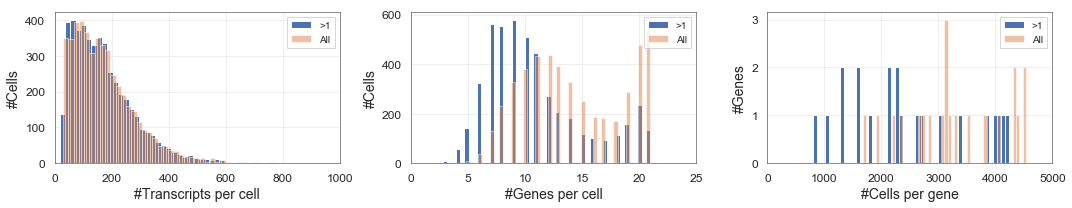

In [3]:
plot_expression_metrics(adata.X, xlim1=1000, xlim2=25, xlim3=5000);

In [4]:
get_expression_value_fracs(adata.X)

1       23.448%
2       13.464%
3        8.813%
4        6.282%
5        4.693%
6        3.538%
7        2.774%
8        2.431%
9        1.967%
>=10    32.589%
dtype: object

In [5]:
get_scalar_metrics(adata.X)

,#Cells,#Genes,#Transcripts,Sparsity Level
0,4813,21,871739.0,0.318819


### osmFISH

In [6]:
adata = sc.read_loom("../data/osmFISH_SScortex_mouse_all_cells.loom")
adata.X = adata.X.A

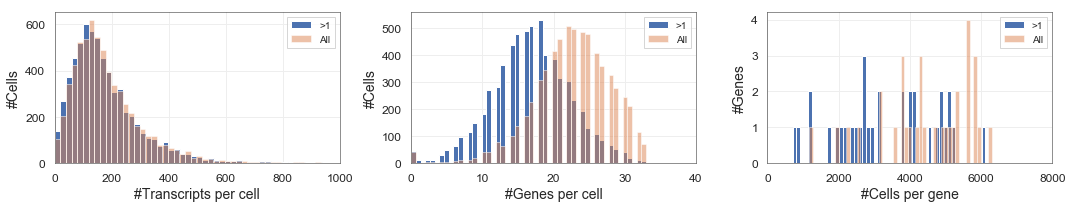

In [7]:
plot_expression_metrics(adata.X, xlim1=1000, xlim2=40, xlim3=8000);

In [8]:
get_expression_value_fracs(adata.X)

1       25.823%
2       17.196%
3        11.45%
4        7.929%
5        5.702%
6        4.336%
7        3.219%
8        2.588%
9        2.102%
>=10    19.655%
dtype: object

In [9]:
get_scalar_metrics(adata.X)

,#Cells,#Genes,#Transcripts,Sparsity Level
0,6471,33,1248106.0,0.313721


### STARmap

#### 1020 genes

In [10]:
adata_1020 = read_starmap("../data/star_map/visual_1020_20180505_BY3_1kgenes/")

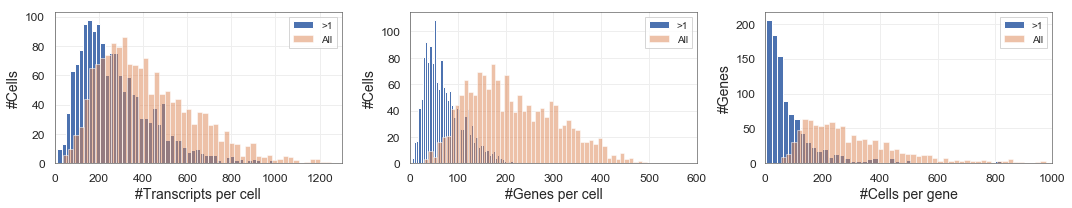

In [11]:
plot_expression_metrics(adata_1020.X, xlim1=1300, xlim2=600, xlim3=1000);

In [12]:
get_expression_value_fracs(adata_1020.X)

1       66.096%
2       18.848%
3        6.779%
4        3.006%
5        1.535%
6        0.902%
7        0.584%
8        0.408%
9        0.301%
>=10     1.541%
dtype: object

In [13]:
get_scalar_metrics(adata_1020.X)

,#Cells,#Genes,#Transcripts,Sparsity Level
0,1549,1020,652282.0,0.790034


#### 160 genes

In [14]:
adata_160 = read_starmap("../data/star_map/visual_160_20171120_BF4_light/")

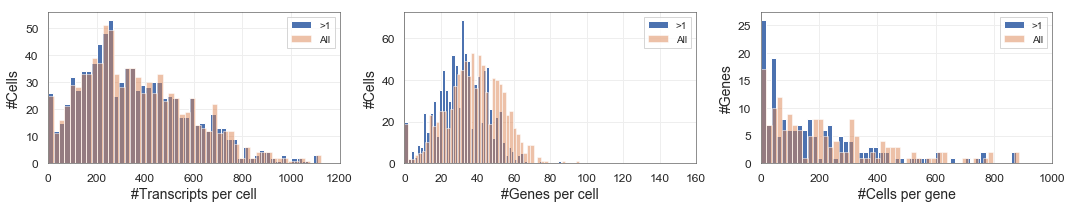

In [15]:
plot_expression_metrics(adata_160.X, xlim1=1200, xlim2=160, xlim3=1000);

In [16]:
get_expression_value_fracs(adata_160.X)

1         16.8%
2       12.481%
3       10.116%
4        8.251%
5         6.44%
6        5.653%
7        4.746%
8        4.109%
9        3.438%
>=10    27.966%
dtype: object

In [17]:
get_scalar_metrics(adata_160.X)

,#Cells,#Genes,#Transcripts,Sparsity Level
0,931,160,350736.0,0.760963


#### 1020 genes, subset

In [18]:
adata_1020s = sc.AnnData(adata_1020.to_df()[np.intersect1d(adata_160.var_names, adata_1020.var_names)])

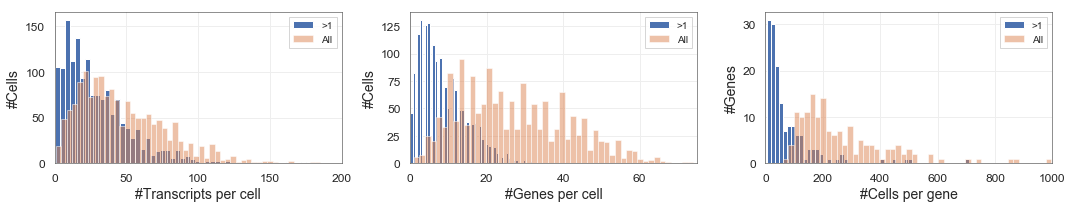

In [19]:
plot_expression_metrics(adata_1020s.X, xlim1=200, xlim2=75, xlim3=1000);

In [20]:
get_expression_value_fracs(adata_1020s.X)

1       68.909%
2       17.736%
3        5.924%
4        2.535%
5        1.287%
6        0.905%
7        0.605%
8        0.442%
9        0.372%
>=10     1.287%
dtype: object

In [21]:
get_scalar_metrics(adata_1020s.X)

,#Cells,#Genes,#Transcripts,Sparsity Level
0,1549,153,73304.0,0.824213


### seqFISH+

In [22]:
df_spatial = pd.read_csv("../data/seq_fish_nih3t3.csv")
adata = sc.AnnData(df_spatial.groupby(["gene", "cell"]).size().unstack(fill_value=0).T)

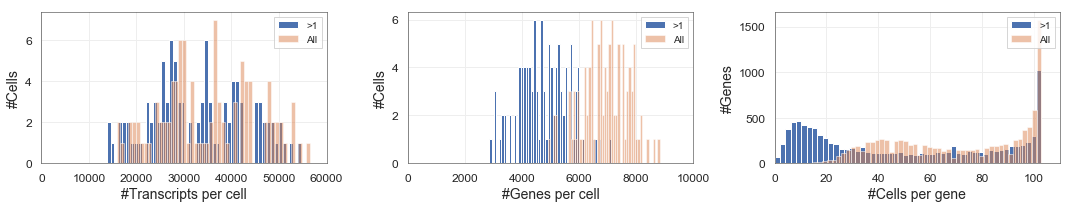

In [23]:
plot_expression_metrics(adata.X, xlim1=60000, xlim2=10000, xlim3=110);

In [24]:
get_expression_value_fracs(adata.X)

1        31.06%
2       18.305%
3        11.54%
4        7.934%
5        5.821%
6         4.43%
7        3.429%
8         2.67%
9        2.151%
>=10    12.661%
dtype: object

In [25]:
get_scalar_metrics(adata.X)

,#Cells,#Genes,#Transcripts,Sparsity Level
0,103,10000,3755499.0,0.309245


## MERFISH

In [26]:
df_spatial = pd.read_csv("../data/merfish_coords_perprocessed.csv")
df_spatial = df_spatial[df_spatial.cell > 0]
adata = sc.AnnData(df_spatial.groupby(["gene", "cell"]).size().unstack(fill_value=0).T)
adata.shape

(6976, 140)

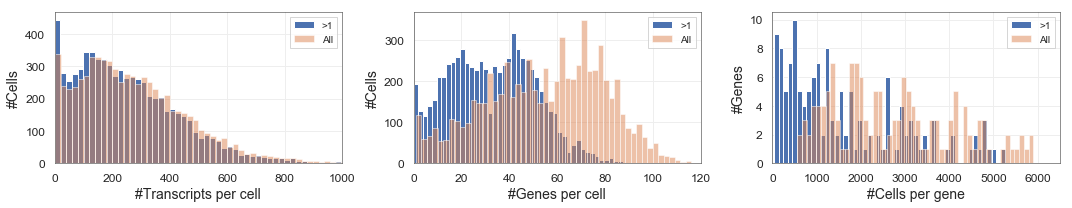

In [27]:
plot_expression_metrics(adata.X, xlim1=1000, xlim2=120, xlim3=6500);

In [28]:
get_expression_value_fracs(adata.X)

1       40.304%
2       17.035%
3        9.256%
4        6.085%
5        4.306%
6        3.259%
7        2.637%
8        2.133%
9        1.764%
>=10    13.223%
dtype: object

In [29]:
get_scalar_metrics(adata.X)

,#Cells,#Genes,#Transcripts,Sparsity Level
0,6976,140,1927913.0,0.607968
